In [21]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import yaml
import matplotlib
import utils
import train_bitmap

from importlib import reload

In [67]:
config = utils.DotDict(yaml.safe_load(open('experiments/copy/ntm/config.yaml')))

# customize config
config.load = 'experiments/copy/ntm/checkpoints/NTM-1600.pth'

In [68]:
model, optimizer, loss, train_data, validation_data, step = train_bitmap.setup_model(config)

In [69]:
x, y, m = train_data.gen_batch(1, 30, 30)

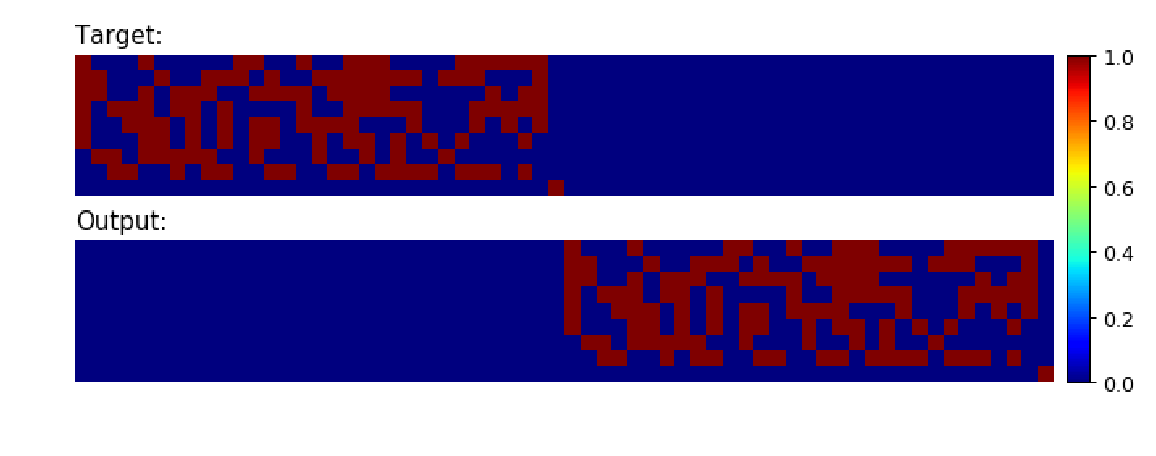

In [70]:
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(np.rollaxis(utils.input_output_img(x[0].numpy().T, y[0].numpy().T).T, 1, 0))
plt.show()

In [88]:
model.read_head.new_sequence()
model.write_head.new_sequence()
model.controller.new_sequence()
model.mem_init(x.size(0), x.device)

out = []
mem = []
read = []
write = []

for t in range(x.size(1)):
    out.append(model.step(x[:, t], debug=False))
    mem.append(model.memory)
    read.append(model.read_head.get_prev_dist(model.memory))
    write.append(model.write_head.get_prev_dist(model.memory))

In [89]:
torch.sigmoid(torch.stack(out, dim=1)).detach().numpy().shape

(1, 62, 9)

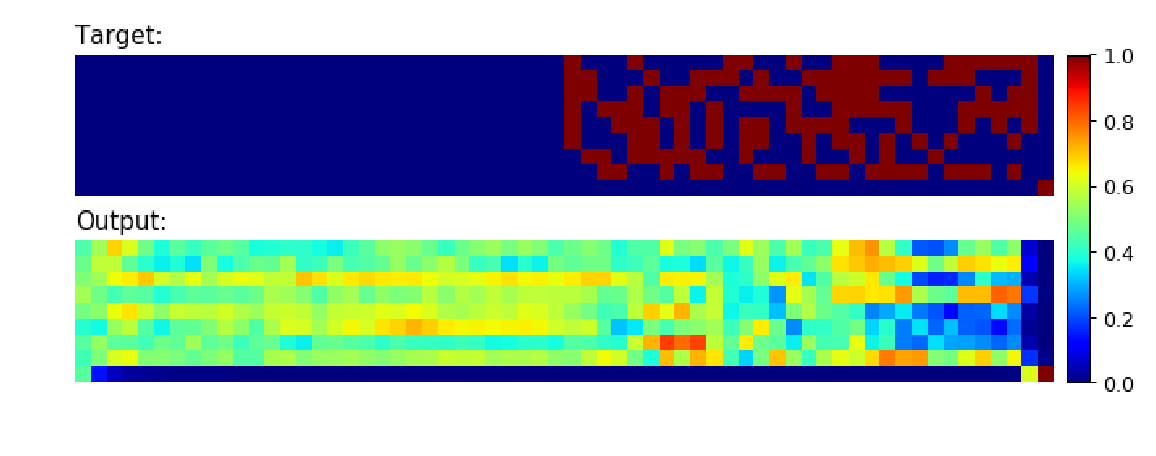

In [90]:
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(np.rollaxis(utils.input_output_img(y[0].numpy().T, torch.sigmoid(torch.stack(out, dim=1)).detach().numpy()[0].T).T, 1, 0))
plt.show()



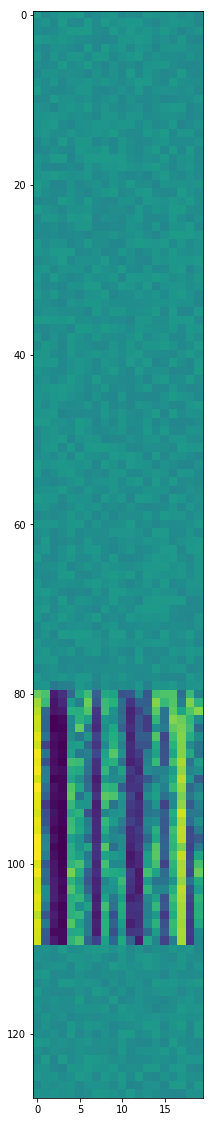

In [91]:
plt.figure(figsize=(20, 20))
plt.imshow(mem[30][0].detach().numpy())
plt.show()

In [92]:
mem[-1].shape

torch.Size([1, 128, 20])

In [93]:
write[-1].shape

torch.Size([1, 1, 128])

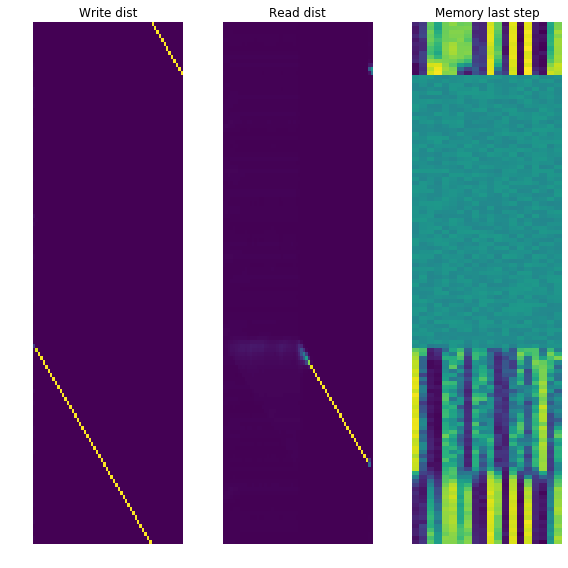

In [94]:
plt.figure(figsize=(8, 8))
for i, (arr, name) in enumerate(zip((write, read), ('Write dist', 'Read dist')), 1):
    plt.subplot(1, 3, i)
    plt.imshow(torch.stack(arr).squeeze().detach().numpy().T, aspect="auto")
    plt.axis('off')
    plt.title(name)

plt.subplot(1, 3, 3)
plt.imshow(mem[-1][0].detach().numpy(), aspect="auto")
plt.axis('off')
plt.title('Memory last step')
    
plt.tight_layout()
plt.show()